In [113]:
import parselmouth
import soundfile as sf
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

from parselmouth.praat import call

In [114]:
sound = parselmouth.Sound('c:/nmb/nmb_data/M2.wav')

print(sound)

Object type: Sound
Object name: <no name>
Date: Tue Apr 27 15:08:04 2021

Number of channels: 1 (mono)
Time domain:
   Start time: 0 seconds
   End time: 5 seconds
   Total duration: 5 seconds
Time sampling:
   Number of samples: 240000
   Sampling period: 2.0833333333333333e-05 seconds
   Sampling frequency: 48000 Hz
   First sample centred at: 1.0416666666666666e-05 seconds
Amplitude:
   Minimum: -0.390014648 Pascal
   Maximum: 0.437866211 Pascal
   Mean: 1.90734863e-09 Pascal
   Root-mean-square: 0.0584435295 Pascal
Total energy: 0.0170782307 Pascal² sec (energy in air: 4.26955768e-05 Joule/m²)
Mean power (intensity) in air: 8.53911536e-06 Watt/m² = 69.31 dB
Standard deviation in channel 1: 0.0584436513 Pascal



In [115]:
manipulation = call(sound, 'To Manipulation', 0.01, 75, 600)

print(manipulation)

Object type: Manipulation
Object name: untitled
Date: Tue Apr 27 15:08:04 2021

Domain:
   xmin: 0
   xmax: 5



In [116]:
pitch_tier = call(manipulation, 'Extract pitch tier')

call(pitch_tier, 'Multiply frequencies', sound.xmin, sound.xmax, 2)

call([pitch_tier, manipulation], 'Replace pitch tier')
sound_octave_up = call(manipulation, 'Get resynthesis (overlap-add)')

In [117]:
# sf.write('c:/nmb/nmb_data/M2_pitch.wav', data = sound_octave_up.values, samplerate = sound_octave_up.sampling_frequency)

In [118]:
print(sound.values)
print(sound_octave_up.values)

[[-0.00082397 -0.00082397 -0.00079346 ... -0.01159668 -0.0118103
  -0.01205444]]
[[-0.00082398 -0.00082398 -0.00079346 ... -0.01159668 -0.0118103
  -0.01205445]]


In [119]:
print(len(sound.values))
print(len(sound_octave_up.values))

1
1


In [120]:
print(sound.values.shape)
print(type(sound))
sound_data = np.squeeze(sound)
sound_octave_up = np.squeeze(sound_octave_up)
print(sound_data.shape)

(1, 240000)
<class 'parselmouth.Sound'>
(240000,)


In [121]:
data, rate = librosa.load('c:/nmb/nmb_data/M2.wav')

In [122]:
print(len(data))
print(rate)
print(len(sound_data))
print(sound.sampling_frequency)

110250
22050
240000
48000.0


In [123]:
print(type(data))
print(type(int(sound.sampling_frequency)))

<class 'numpy.ndarray'>
<class 'int'>


In [124]:
# sf.write('c:/nmb/nmb_data/M2_parsel.wav', data = sound_data, samplerate = int(sound.sampling_frequency))

In [125]:
sound_rate = int(sound.sampling_frequency)

In [126]:
mel_sound_data = librosa.feature.melspectrogram(sound_data, sound_rate, n_fft = 512, hop_length = 128, win_length = 512)
mel_sound_data = librosa.amplitude_to_db(mel_sound_data, ref = np.max)
mel_data = librosa.feature.melspectrogram(data, rate, n_fft = 512, hop_length = 128, win_length = 512)
mel_data = librosa.amplitude_to_db(mel_data, ref = np.max)
mel_octave_up = librosa.feature.melspectrogram(sound_octave_up, sound_rate, n_fft = 512, hop_length = 128, win_length = 512)
mel_octave_up = librosa.amplitude_to_db(mel_octave_up, ref = np.max)

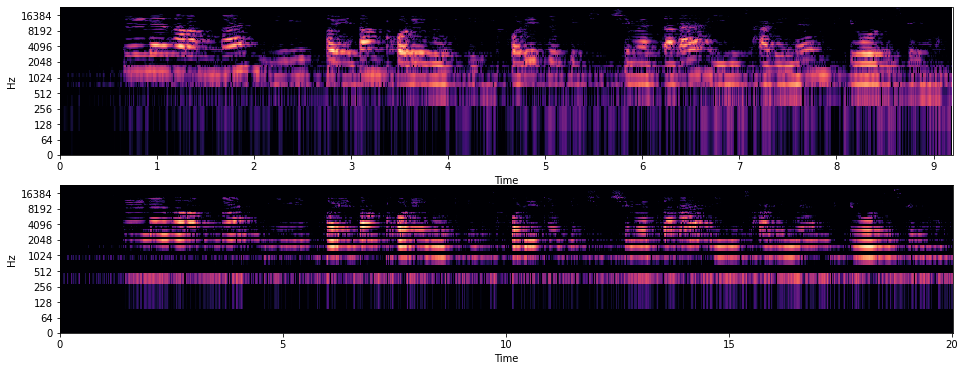

In [127]:
fig = plt.figure(figsize = (16, 6))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# librosa.display.waveplot(sound_data, sound_rate, ax = ax1)
# librosa.display.waveplot(data, rate, ax = ax2)
librosa.display.specshow(mel_data, sr = sound_rate, ax = ax1, x_axis='time', y_axis='log')
librosa.display.specshow(mel_octave_up, sr = sound_rate, ax = ax2, x_axis='time', y_axis='log')

plt.show()

In [128]:
# sound_octave_up.save('M2_octave.wav', 'WAV')

AttributeError: 'numpy.ndarray' object has no attribute 'save'

In [129]:
print(data, '\n', rate)

[-0.00059613 -0.00085017 -0.00061753 ... -0.01141425 -0.01117867
 -0.01249205] 
 22050


In [134]:
data_octave_down = librosa.effects.pitch_shift(data, rate, n_steps = -4)

sf.write('c:/nmb/nmb_data/octave_down.wav', data_octave_down, rate)